<a href="https://colab.research.google.com/github/githublior/basic-cnn-mnist/blob/main/DL_Notebook_2_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

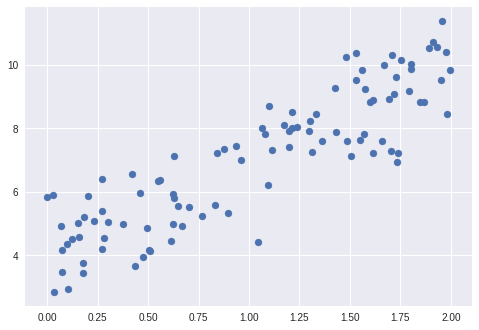

In [ ]:
# Sample some data, with some white noise

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# np.rand - sample uniformly between [0, 1)
# np.randn - sample normaly with mu = 0, sigma = 1

plt.scatter(X, y)

In [ ]:
# Use Sklearn LinearRegression
# For mode information about sklearn.LinearRegression please refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

lr = LinearRegression()

lr.fit(X, y)
print('Slope: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

# You can see that they are pretty similat to our original 3 and 4, but not perfect because of the noise.

Slope: 
 [[2.9847376]]
Intercept: 
 [3.9726115]


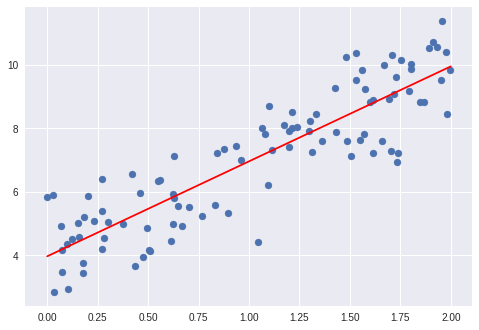

In [ ]:
# Let's plot the regression line

line_x = np.linspace(0, 2., 100)
plt.scatter(X, y)
plt.plot(line_x, lr.intercept_ + lr.coef_[0]*line_x, c='red')


In [ ]:
# If we remove the noise:

X = 2 * np.random.rand(100,1)
y = 4 +3 * X

lr = LinearRegression()

lr.fit(X, y)
print('Slope: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

# We get perfect values

Slope: 
 [[3.]]
Intercept: 
 [4.]


In [ ]:
# Let's work with real data now...

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/ML\ course/data/Bike-Sharing-Dataset\ 2

day.csv  hour.csv  Readme.txt


In [ ]:
# loading the data

raw = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML course/data/Bike-Sharing-Dataset 2/day.csv')

In [ ]:
raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


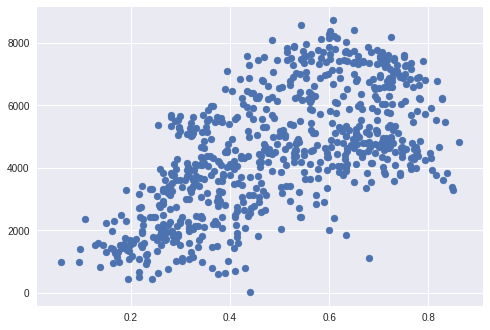

In [ ]:
fig, ax = plt.subplots()
ax.scatter(raw["temp"], raw["cnt"])
plt.show()

In [ ]:
X = raw["temp"].values.reshape(-1,1)
y = raw["cnt"].values.reshape(-1,1)

lr = LinearRegression()

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [ ]:
X_test = np.array([0.2, 0.3, 0.4, 0.5, 0.6]).reshape(-1,1)
lr.predict(X_test)

array([[2542.78411874],
       [3206.85511859],
       [3870.92611845],
       [4534.9971183 ],
       [5199.06811816]])

Coefficients: 
 [[6640.70999855]]
Mean squared error: 2272020.26


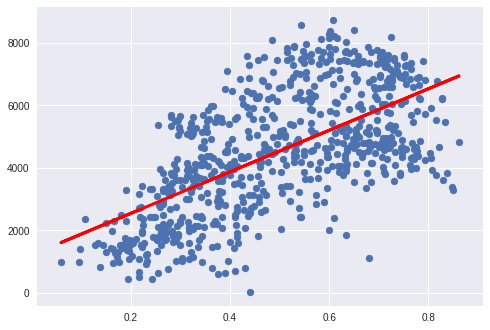

In [ ]:
y_hat = lr.predict(X)

print('Coefficients: \n', lr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y, y_hat))


# Plot linear regression curve

plt.scatter(X, y)
plt.plot(X, y_hat, color='red', linewidth=3)


plt.show()
